# DSCI 100 - Group Project: Predictive Modeling of Gaming Newsletter Subscriptions!
Group 14, Section 009

GitHub Repository Link: https://github.com/anasakbar-05/DSCI_100_Group_Project_009_14

### Introduction

    For this project, we are working with a real dataset from a UBC Computer Science research group led by Frank Wood. The group studies how people play video games by running their own Minecraft server, where the players' in-game actions are automatically recorded as they move around and interact with the world. Since this is an ongoing research project, the team needs assistance figuring out how to target the right kinds of players that will give them lots of data, and how to allocate limited resources (server hardware and software licenses) with the goal of supporting their research. To guide their decisions, they outlined three broad questions related to predicting player behaviour, player types, and server usage patterns. The chosen question will then be used to formulate a more specific question that can be answered within the scope of this project and course (DSCI 100).

Our group decided to focus on the first broad question: 

**What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?** 

Then, we specified it into one clear research question for the project:

**“Can a player’s `age`, `experience` level, and `gender` be used to accurately predict their subscription status to the game-related newsletter?”**

    To answer this, we used the `players.csv` dataset provided by the research group. It includes player demographics (such as gender and age), gameplay behaviours (like experience level and total hours played), and whether or not each player subscribed to the newsletter. With these variables, we can explore patterns across different kinds of players and build a model that predicts subscription status based on gameplay and demographic features. It will be useful to the research group to allow them to better understand what drives player engagement and how to target their future recruitment efforts.

*Note: while a secondary dataset, `sessions.csv`, is available, this analysis will focus on `players.csv` for a focused approach to answering the specific research question with the most relevant data.*

In [48]:
set.seed(1234)
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)

url = "http://drive.google.com/uc?rxport-download&id=19dtTv9I4hUdTKPBrM1QgI3A0ru68ssds"
players <- read_csv(url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [3]:
players_summary <- summary(players)
players_summary

distinct(players, experience)
distinct(players, subscribe)
distinct(players, gender)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


subscribe
<lgl>
TRUE
FALSE


gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


### Description of the Players dataset — players.csv

The `players.csv` file contains data on 196 players (it has 196 observations) and includes 7 variables describing each player’s. Each row represents one unique player.

| Variable name    | Type      | Meaning                                                                                                                                  |
| ---------------- | --------- | ---------------------------------------------------------------------------------------------------------------------------------------- |
| **experience**   | Character | Self-reported experience level. Categories include: *Beginner, Regular, Amateur, Pro, Veteran*.                                          |
| **subscribe**    | Logical   | Whether a player subscribed to the game-related newsletter (*TRUE/FALSE*).                                                               |
| **hashedEmail**  | Character | A hashed version of each player’s email address (used as an anonymized identifier).                                                      |
| **played_hours** | Numeric   | Total number of hours the player spent in the game during the session.  |
| **name**         | Character | Player’s display name.                                                                                                                   |
| **gender**       | Character | The player’s gender identity. Categories include: *Female, Male, Non-binary, Two-Spirited, Agender, Prefer not to say, Other*.           |
| **Age**          | Numeric    | Player’s self-reported age in years.                                                                                                                   |

### Summary Statistics:

**`Played hours`**
|**Mean**|**Median**|**Min**|**Max**|
|--- | --- |--- | --- |
| 5.85| 0.10|0|223.1|

**`Age`**
|**Mean**|**Median**|**Min**|**Max**|
|--- | --- |--- | --- |
| 21.14| 19.00|9|58|

**`Subscription count`**
|**Subscribed**|**Not**|
|--- | --- |
|144| 52|

### Observations & Potential Issues With the Data:

The `played_hours` of players is a highly skewed variable as most players have very low values. This might affect the conclusions we can draw from any analysis. Also, `played_hours` may not reflect true gameplay as players can leave the game running while AFK (away from keyboard), which could have inflated their hours. This is why it will not be used for this analysis.

The dataset favours players who interacted verbally/talked in the game, since data collection depends on player communication; this is what was said in the researchers FAQ: "Playing without talking is discouraged, If we detect that you are playing with other players without talking, we might remove you from the server." This means the sample might not represent/include quieter or less social players. This limits its size and the dataset may have less diversity in player types and could underrepresent certain playstyles or demographics.
(Source: https://plaicraft.ai/faq/gameplay).

Other smaller, but still notable details about the dataset include the following:

1. The `"hashedEmail"` isn’t very helpful analytically. Since it’s hashed, we can’t decode it or use it for linking across datasets.

2. `"Age"` may not be fully reliable. Players can easily enter an inaccurate age, introducing systematic measurement error.

3. `"experience"` and `"gender"` will have to be converted to factor-type variables for further analysis.

## Methods and Results

For our question, we plan to use **Knn-Classification** on the predicators, `Gender`, `Age`, `Experience`, to predict when `subscribe` = `TRUE`. We chose Knn-Classification because it predicts a categorical response variable, just like our `subscribe`, which is split into two categories of `TRUE` and `FALSE`. 

This plan presents certain limitations like class imbalance in `gender` where the `Male` category has a large majority and is therefore more likely to be predicted out of probability. Furthermore, other limitations of the Knn-classification algorithm includes biases towards variables with a larger numerical range; to resolve this issue, we will standardize (both variables will be centered and scaled to have a mean of zero and a standard deviation of one) before splitting up the data into testing and training sets. An addititional prerequisite step would be would to convert `experience` and `gender` into a numeric vector before starting. 

We will **split the data into 75% training and 25% testing** sets. 
Prior to the classification:  

1. standardize the data
2. split into training/ testing
3. cross-validate and k-tune to find best K, with the highest accuracy.
4. use on testing set to find accuracy and precision of model
5. evaluate excellence of model, consider if further revisions of the model is needed.

### Exploratory Data Visualizations and Analyses

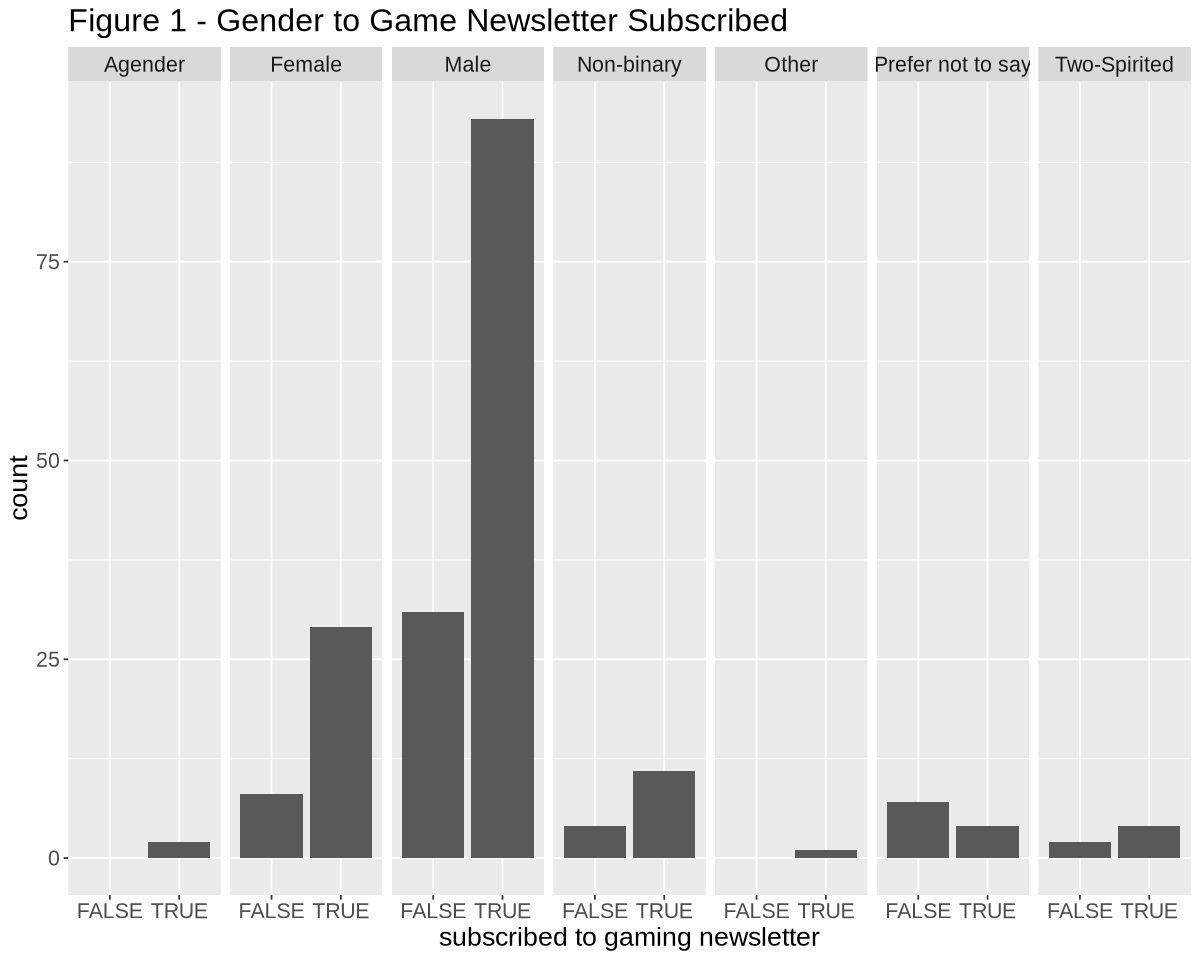

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”


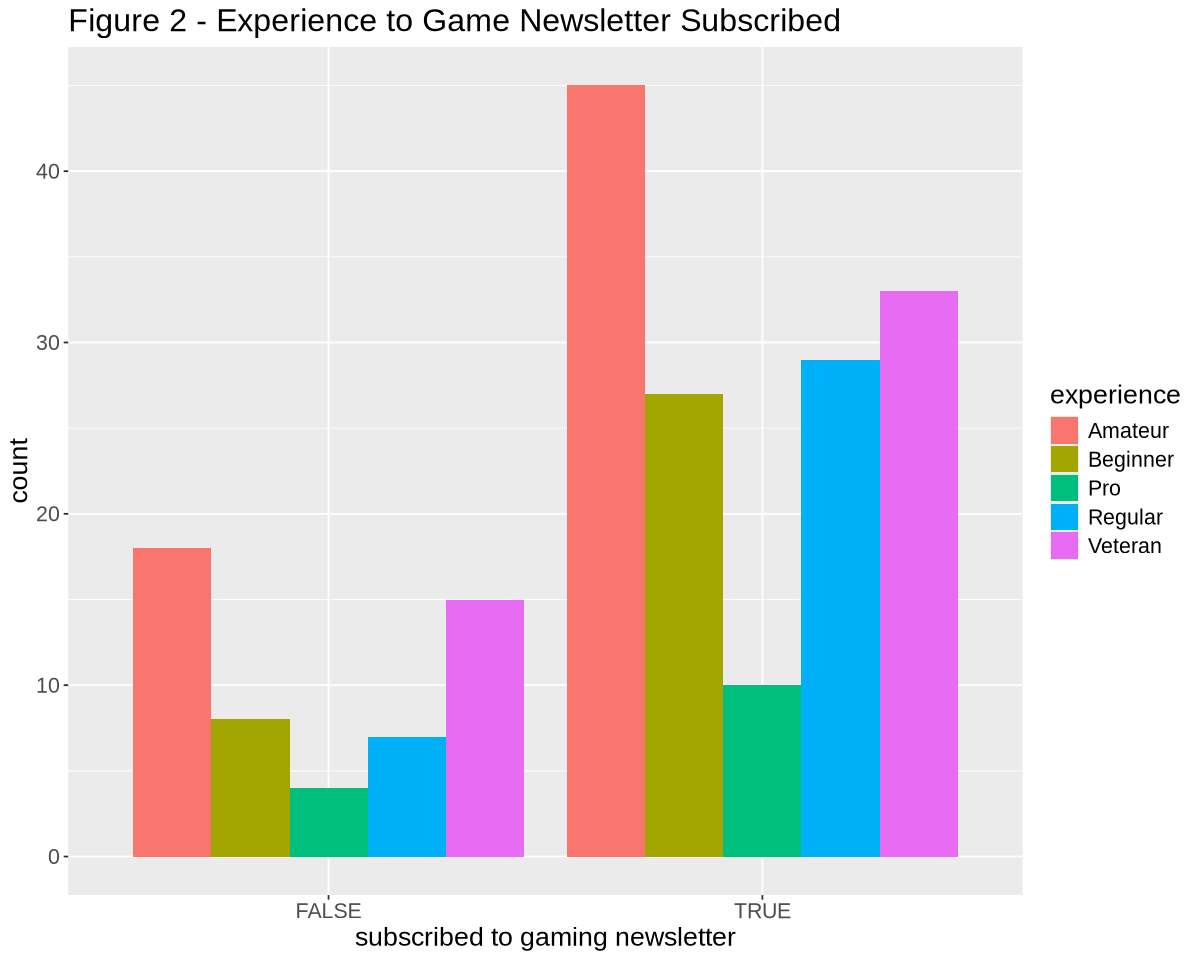

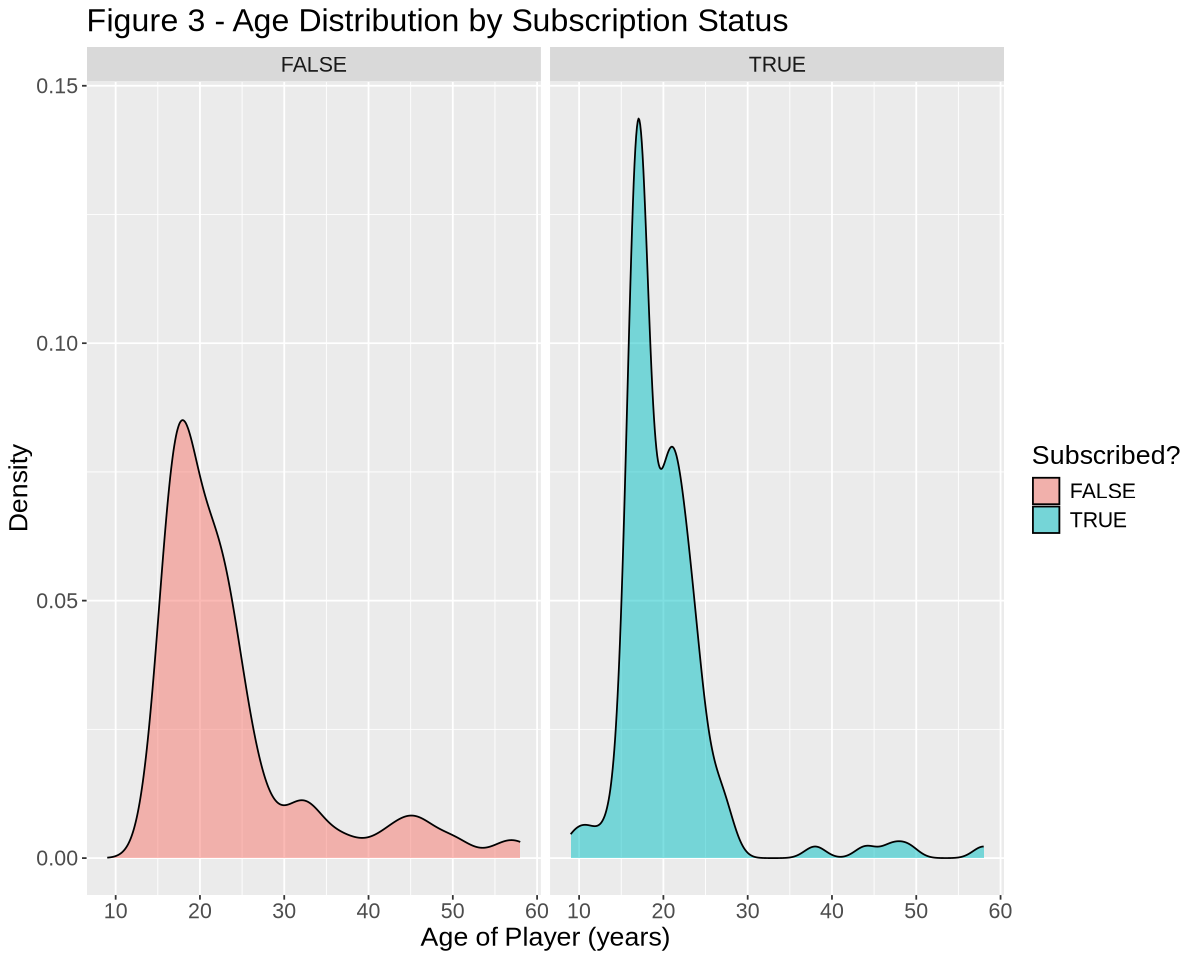

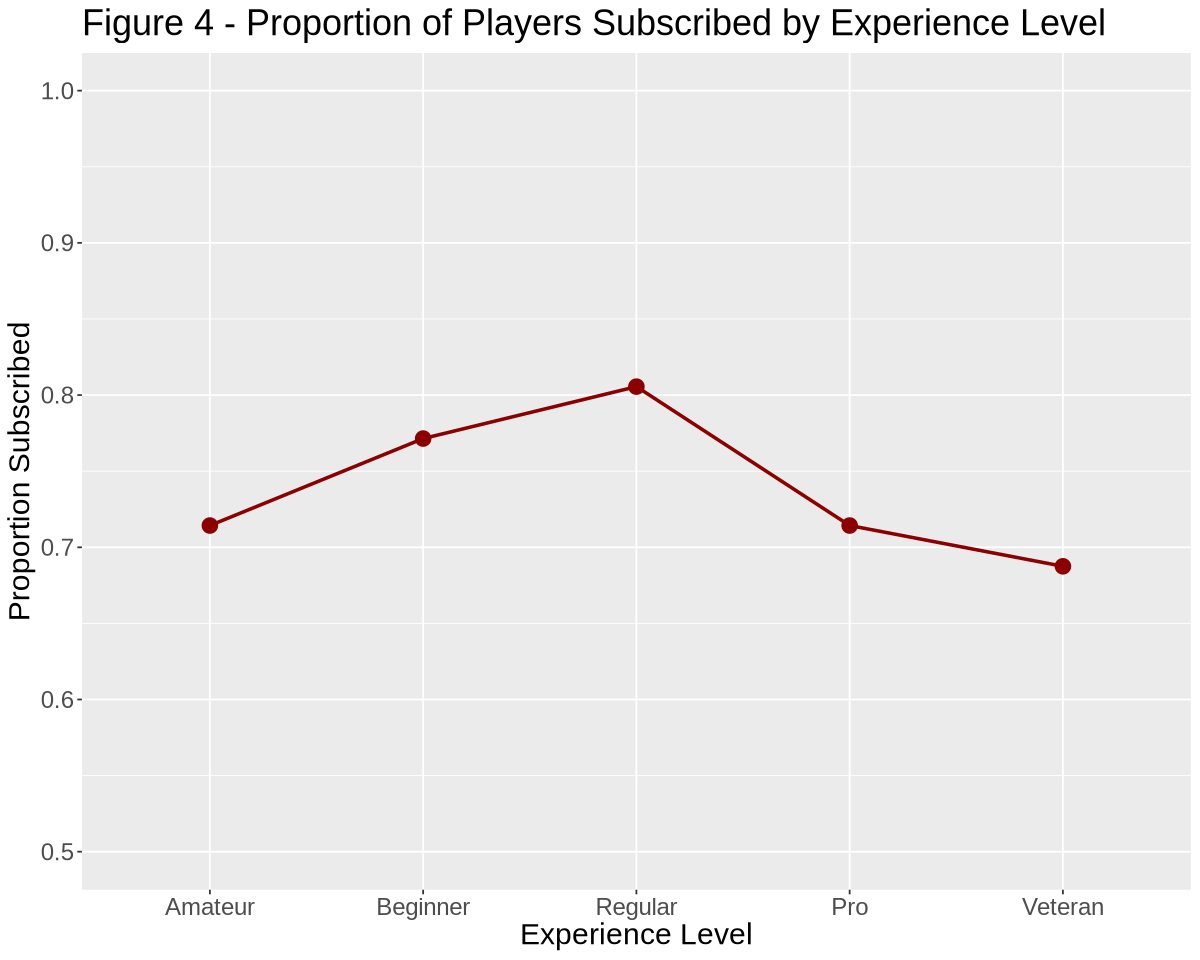

In [120]:
options(repr.plot.width = 10, repr.plot.height = 8)
figure_1 <- ggplot(players, aes(x=subscribe)) + geom_bar() + facet_grid(cols = vars(gender)) + 
    labs( title = "Figure 1 - Gender to Game Newsletter Subscribed") +
    xlab("subscribed to gaming newsletter") +
    theme(text = element_text(size=16))

figure_2 <- ggplot(players, aes(x=subscribe)) + geom_bar(aes(fill=experience), position="dodge") + 
    labs( title = "Figure 2 - Experience to Game Newsletter Subscribed") +
    xlab("subscribed to gaming newsletter") +
    theme(text = element_text(size=16))

figure_3 <- ggplot(players, aes(x = Age, fill = subscribe)) +
  geom_density(alpha = 0.5) +
  facet_wrap(vars(subscribe)) +
  labs(
    title = "Figure 3 - Age Distribution by Subscription Status",
    x = "Age of Player (years)",
    y = "Density",
    fill = "Subscribed?"
  ) +
  theme(text = element_text(size = 16))

players$experience <- factor(players$experience,
                             levels = c("Amateur", "Beginner", "Regular", "Pro", "Veteran"))

prop_exp <- players|>
  group_by(experience) |>
  summarise(
    proportion_subscribed = mean(subscribe == TRUE)
  )
figure_prop_exp2 <- ggplot(prop_exp, aes(x = experience, y = proportion_subscribed)) +
  geom_point(size = 4, color = "darkred") +
  geom_line(group = 1, color = "darkred", linewidth = 1) +
  #scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
  labs(
    title = "Figure 4 - Proportion of Players Subscribed by Experience Level",
    x = "Experience Level",
    y = "Proportion Subscribed"
  ) +
  theme(text = element_text(size = 18))+
    ylim(0.5, 1)

figure_1
figure_2
figure_3 
figure_prop_exp2 

#### Plot Insights

**Figure 1** - The goal of this figure is to relate and show a relationship or draw a conclusion from the variables `subcription` and `gender`. We can observe out of all the genders, the male category undoubtebly has the most people subscribed.

**Figure 2** - The goal of this figure is to relate and show a relationship or draw a conclusion from the variables `subscription` and `experience`. We can observe Amateurs have the highest proportion of subscribing to a newsletter out of any experience level.

**Figure 3** - The goal of this figure is to relate and show a relationship or draw a conclusion from the variables `subcription` and `Age`. We can see a pattern in the scatterplot that most players subscribed are approximately between Ages of 15 - 25.

**Figure 4** - This tell us the more experienced players like Pros, and Veterans are predicted to be less likely to subcribe to our newsletter. This could help the research lab identify and search for why this is the case, as we want super heavy players that give us a lot of data to participate.

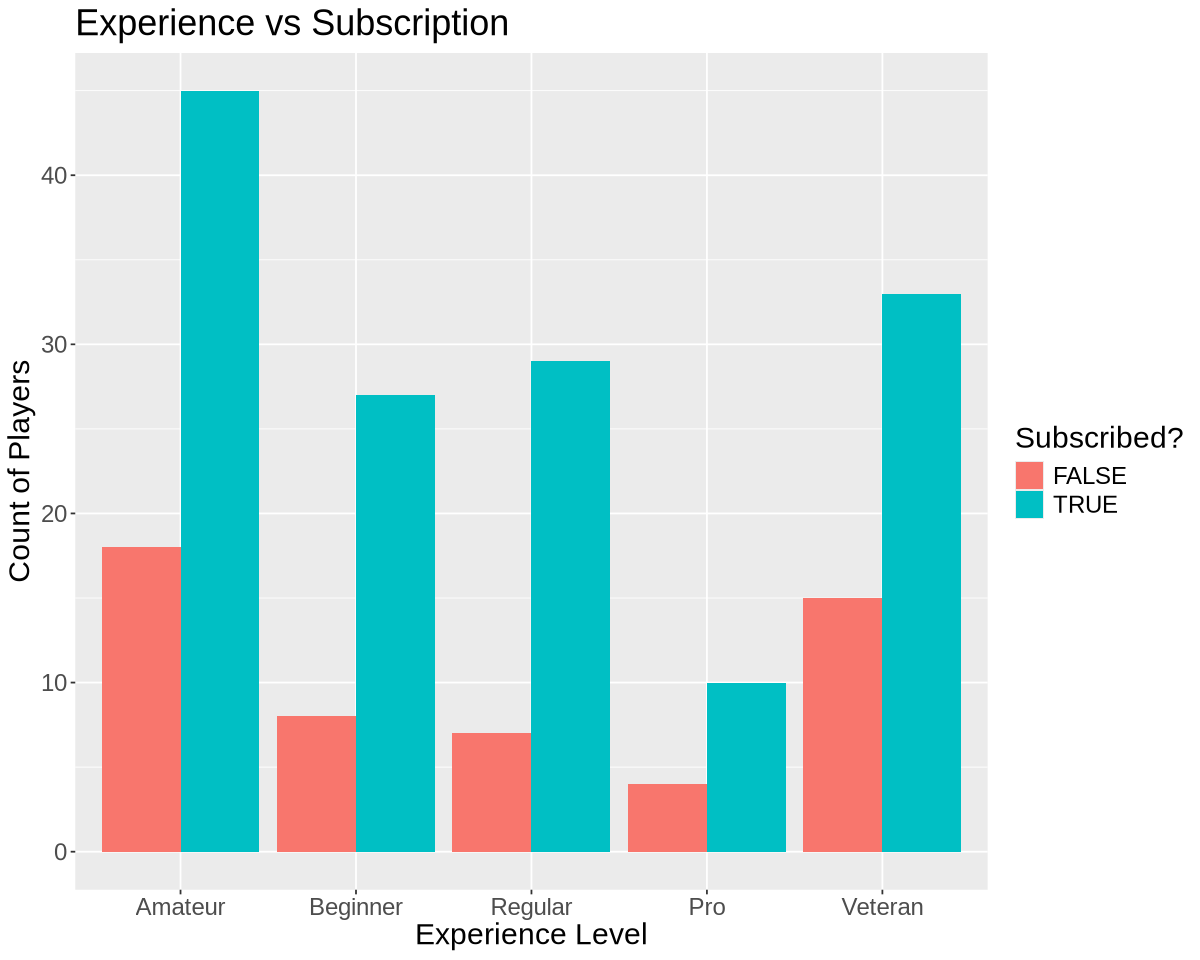

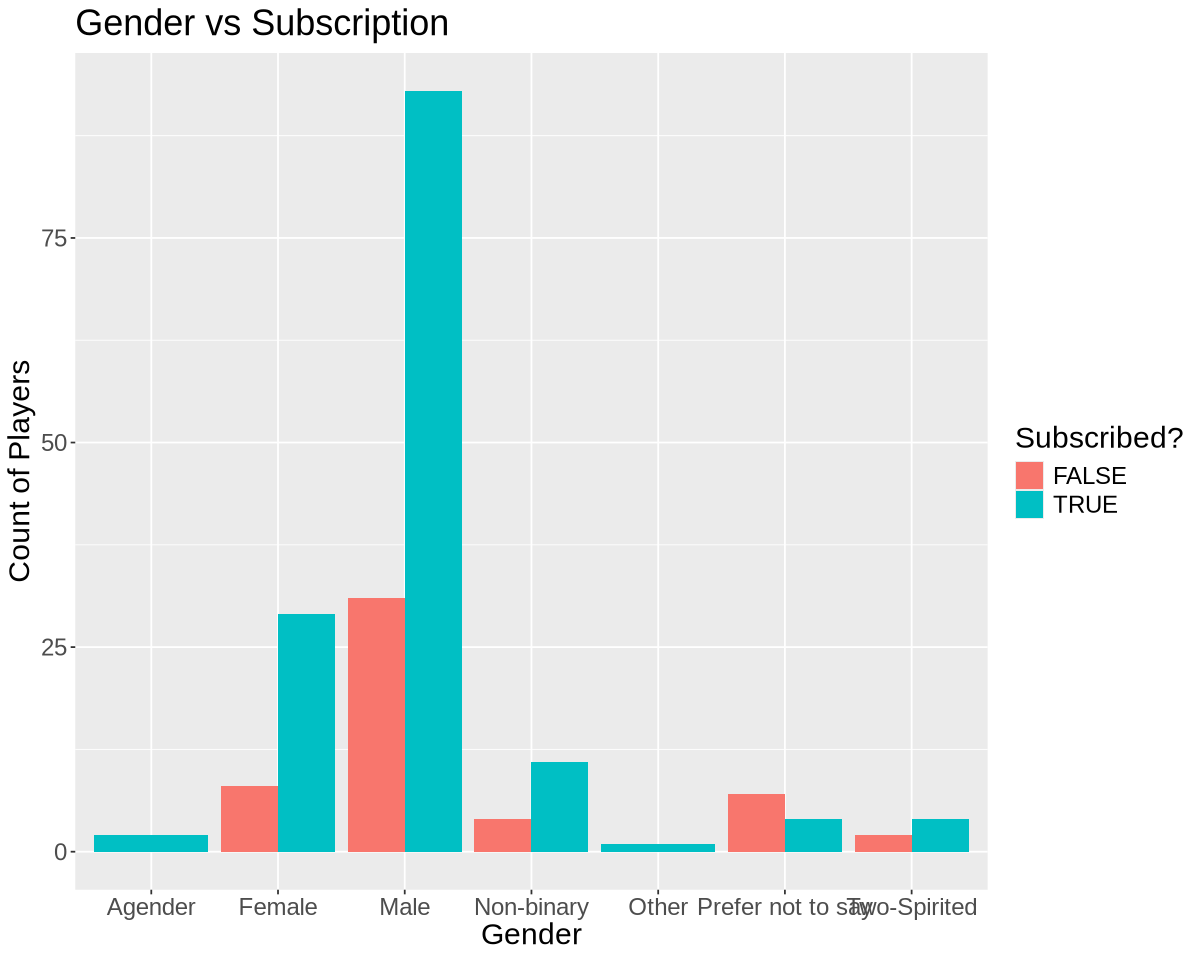

In [121]:
#Don't need these plots?

figure_exp <- ggplot(players, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Experience vs Subscription",
    x = "Experience Level",
    y = "Count of Players",
    fill = "Subscribed?"
  ) +
  theme(text = element_text(size = 18))
figure_exp

figure_gender <- ggplot(players, aes(x = gender, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Gender vs Subscription",
    x = "Gender",
    y = "Count of Players",
    fill = "Subscribed?"
  ) +
  theme(text = element_text(size = 18))
figure_gender

### Wrangling the data

In [50]:
#Getting rid of any NAs in the data and filtering so any players with no playtime is eliminated from the data frame.
clean_players <- players |> 
            select(c(1,2,4,6,7))|>
            filter(!is.na(Age))|> 
            filter(played_hours>0)


clean_players$subscribe <- factor(clean_players$subscribe)
head(clean_players)

experience,subscribe,played_hours,gender,Age
<chr>,<fct>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.1,Male,47
Veteran,TRUE,1.6,Female,23


In [92]:
clean_players$experience <- factor(clean_players$experience)
one_hot_matrix <- model.matrix(~ experience - 1, data = clean_players)
one_hot_players <- clean_players|>select(c(2,5))|>
    bind_cols(as_tibble(one_hot_matrix))

head(one_hot_players)

one_hot_players$subscribe <- factor(one_hot_players$subscribe, 
                                    levels = c("TRUE", "FALSE"))

subscribe,Age,experienceAmateur,experienceBeginner,experiencePro,experienceRegular,experienceVeteran
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TRUE,9,0,0,1,0,0
TRUE,17,0,0,0,0,1
TRUE,21,1,0,0,0,0
TRUE,21,0,0,0,1,0
TRUE,47,1,0,0,0,0
TRUE,23,0,0,0,0,1


### Data Analysis

In [93]:
#split
players_split <- initial_split(one_hot_players, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

In [94]:
#recipe
players_recipe <- recipe(subscribe ~., data = players_train)|>
step_scale(all_predictors())|>
step_center(all_predictors())

In [95]:
#specification
players_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
set_engine("kknn")|>
set_mode("classification")

In [96]:
#k-values
players_ks <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

In [97]:
#v-fold
players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

In [98]:
#workflow + validation
players_tune_fit <- workflow()|>
        add_recipe(players_recipe)|>
        add_model(players_tune)|>
        tune_grid(resamples = players_vfold, grid = players_ks)

In [99]:
#Number of K accuracy check
players_tune_accuracy <- players_tune_fit|> collect_metrics()|>
    filter(.metric == "accuracy")|>
    select(neighbors, mean)|>
    arrange(-mean)

players_tune_accuracy

neighbors,mean
<dbl>,<dbl>
9,0.7537255
10,0.7537255
5,0.7419608
7,0.7419608
6,0.7301961
8,0.7168627
1,0.6494118
2,0.6494118
4,0.6345098


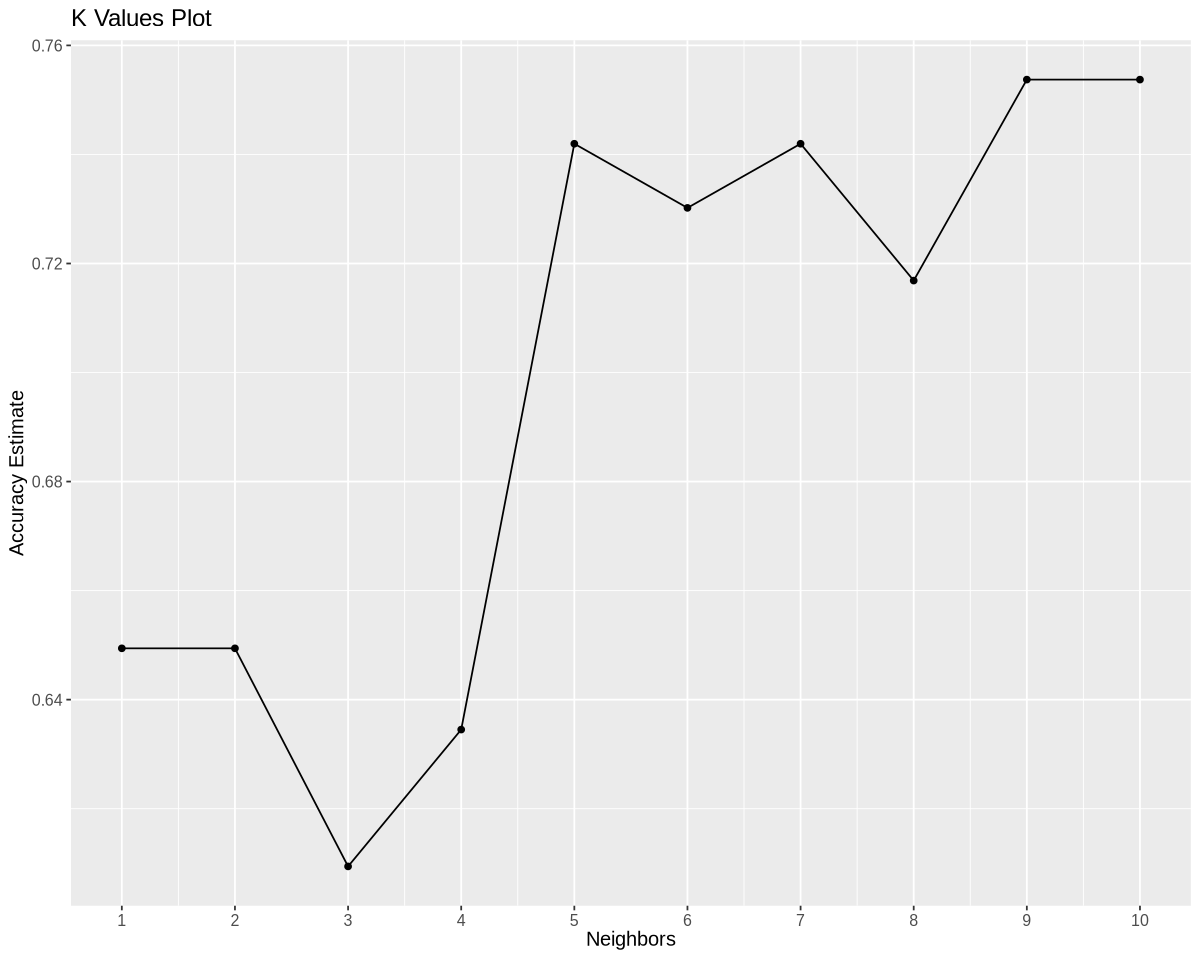

In [122]:
#plot of k values
accuracy_vs_k <- ggplot(players_tune_accuracy, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    scale_x_continuous(breaks = players_tune_accuracy$neighbors) +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("K Values Plot") +
    theme(text = element_text(size = 12))

accuracy_vs_k

Since the *K = 9* provides the highest accuracy among the other values, we can finally build the final model using that K value.

In [107]:
# final model specification
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
    set_engine("kknn") |>
    set_mode("classification")

# final fit
players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    fit(data = players_train)

players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(9,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2592593
Best kernel: rectangular
Best k: 9

In [108]:
#predict subscription in test set
players_test_predictions <- predict(players_fit, players_test) |>
  bind_cols(players_test)
head(players_test_predictions)

.pred_class,subscribe,Age,experienceAmateur,experienceBeginner,experiencePro,experienceRegular,experienceVeteran
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TRUE,TRUE,9,0,0,1,0,0
TRUE,TRUE,17,0,0,0,0,1
TRUE,TRUE,21,1,0,0,0,0
TRUE,TRUE,28,0,0,0,1,0
TRUE,TRUE,17,1,0,0,0,0
TRUE,TRUE,27,0,0,0,0,1


## Evaluating Performance

In [109]:
# accuracy
players_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

# precision
players_test_predictions |>
  precision(truth = subscribe, estimate = .pred_class, event_level = "first") # the "positive" class is the one where subscribe = TRUE

# recall
players_test_predictions |>
  recall(truth = subscribe, estimate = .pred_class, event_level = "first") # the "positive" class is the one where subscribe = TRUE

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.75


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.75


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,1


## Discussion

### Summary of Findings
The KNN classifier achieved a test **accuracy** of 75.0% in predicting subscription status. **Precision** was measured at 75.0%, indicating a high rate of correct positive predictions. The **recall** of 100.0% demonstrates the model's effectiveness in identifying the majority of actual subscribers.

### Comparison to Expectations
These metrics confirm that the selected player characteristic predictors contain meaningful information for subscription classification. The model shows a strength in minimizing false negatives, successfully capturing most subscribers within the dataset. While the overall accuracy is moderate, the balance between precision and recall suggests a reliable predictive capacity.

The results support the initial hypothesis the player characteristics `age`, `experience` level, and `gender` can be used to predict subscription status. 

### Potential Impacts
The findings demonstrate that basic player attributes can serve as a preliminary screening tool for subscription likelihood. Such a model could be integrated into user analytics platforms to flag players for potential engagement.

### Future Questions
1. 

** (not sure if this is right, but below are separate knn classification for each experience level) feel free to change/remove this if it is not needed!

In [26]:
# separating for each experience level
amateur_data <- one_hot_players |>
  select(experienceAmateur, subscribe, played_hours)

beginner_data <- one_hot_players |>
  select(experienceBeginner, subscribe, played_hours)

regular_data <- one_hot_players |>
  select(experienceRegular, subscribe, played_hours)

pro_data <- one_hot_players |>
  select(experiencePro, subscribe, played_hours)

veteran_data <- one_hot_players |>
  select(experienceVeteran, subscribe, played_hours)

In [27]:
# Set seed for reproducibility
set.seed(1234)

# Split data for amateur only
amateur_split <- initial_split(amateur_data, prop = 0.7, strata = subscribe)
amateur_train <- training(amateur_split)
amateur_test <- testing(amateur_split)

# Split data for beginner only
beginner_split <- initial_split(beginner_data, prop = 0.7, strata = subscribe)
beginner_train <- training(beginner_split)
beginner_test <- testing(beginner_split)

# Split data for regular only
regular_split <- initial_split(regular_data, prop = 0.7, strata = subscribe)
regular_train <- training(regular_split)
regular_test <- testing(regular_split)

# Split data for pro only
pro_split <- initial_split(pro_data, prop = 0.7, strata = subscribe)
pro_train <- training(pro_split)
pro_test <- testing(pro_split)

# Split data for veteran only
veteran_split <- initial_split(veteran_data, prop = 0.7, strata = subscribe)
veteran_train <- training(veteran_split)
veteran_test <- testing(veteran_split)

In [28]:
# recipes
amateur_recipe <- recipe(subscribe ~., data = amateur_train)|>
step_scale(all_predictors())|>
step_center(all_predictors())

beginner_recipe <- recipe(subscribe ~., data = beginner_train)|>
step_scale(all_predictors())|>
step_center(all_predictors())

regular_recipe <- recipe(subscribe ~., data = regular_train)|>
step_scale(all_predictors())|>
step_center(all_predictors())

pro_recipe <- recipe(subscribe ~., data = pro_train)|>
step_scale(all_predictors())|>
step_center(all_predictors())

veteran_recipe <- recipe(subscribe ~., data = veteran_train)|>
step_scale(all_predictors())|>
step_center(all_predictors())

In [29]:
# model specification
players_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
set_engine("kknn")|>
set_mode("classification")

In [30]:
#k-values
players_ks <- tibble(neighbors = seq(from = 1, to = 10, by = 1))
pro_ks <- tibble(neighbors = seq(from = 1, to = 5, by = 1)) # because of small subset for pro

In [31]:
#v-folds
amateur_vfold <- vfold_cv(amateur_train, v = 5, strata = subscribe)

beginner_vfold <- vfold_cv(beginner_train, v = 5, strata = subscribe)

regular_vfold <- vfold_cv(regular_train, v = 5, strata = subscribe)

pro_vfold <- vfold_cv(pro_train, v = 5, strata = subscribe)

veteran_vfold <- vfold_cv(veteran_train, v = 5, strata = subscribe)

In [32]:
#workflows + validations
amateur_tune_fit <- workflow()|>
        add_recipe(amateur_recipe)|>
        add_model(players_tune)|>
        tune_grid(resamples = amateur_vfold, grid = players_ks)

beginner_tune_fit <- workflow()|>
        add_recipe(beginner_recipe)|>
        add_model(players_tune)|>
        tune_grid(resamples = beginner_vfold, grid = players_ks)

regular_tune_fit <- workflow()|>
        add_recipe(regular_recipe)|>
        add_model(players_tune)|>
        tune_grid(resamples = regular_vfold, grid = players_ks)

pro_tune_fit <- workflow()|>
        add_recipe(pro_recipe)|>
        add_model(players_tune)|>
        tune_grid(resamples = pro_vfold, grid = pro_ks)

veteran_tune_fit <- workflow()|>
        add_recipe(veteran_recipe)|>
        add_model(players_tune)|>
        tune_grid(resamples = veteran_vfold, grid = players_ks)

In [33]:
#Number of K accuracy check
amateur_tune_accuracy <- amateur_tune_fit|> collect_metrics()|>
    filter(.metric == "accuracy")|>
    select(neighbors, mean)|>
    arrange(-mean)

beginner_tune_accuracy <- beginner_tune_fit|> collect_metrics()|>
    filter(.metric == "accuracy")|>
    select(neighbors, mean)|>
    arrange(-mean)

regular_tune_accuracy <- regular_tune_fit|> collect_metrics()|>
    filter(.metric == "accuracy")|>
    select(neighbors, mean)|>
    arrange(-mean)

pro_tune_accuracy <- pro_tune_fit|> collect_metrics()|>
    filter(.metric == "accuracy")|>
    select(neighbors, mean)|>
    arrange(-mean)

veteran_tune_accuracy <- veteran_tune_fit|> collect_metrics()|>
    filter(.metric == "accuracy")|>
    select(neighbors, mean)|>
    arrange(-mean)

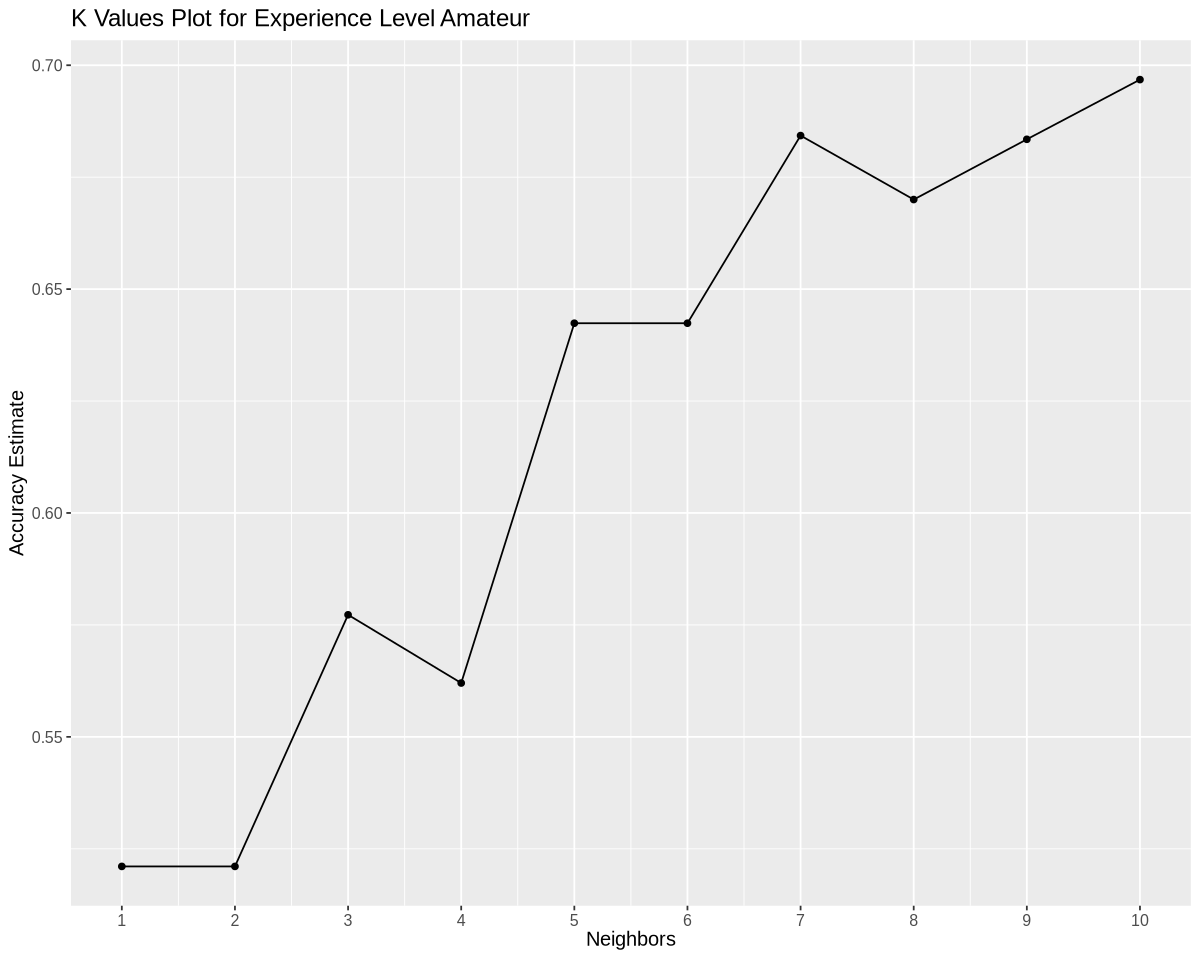

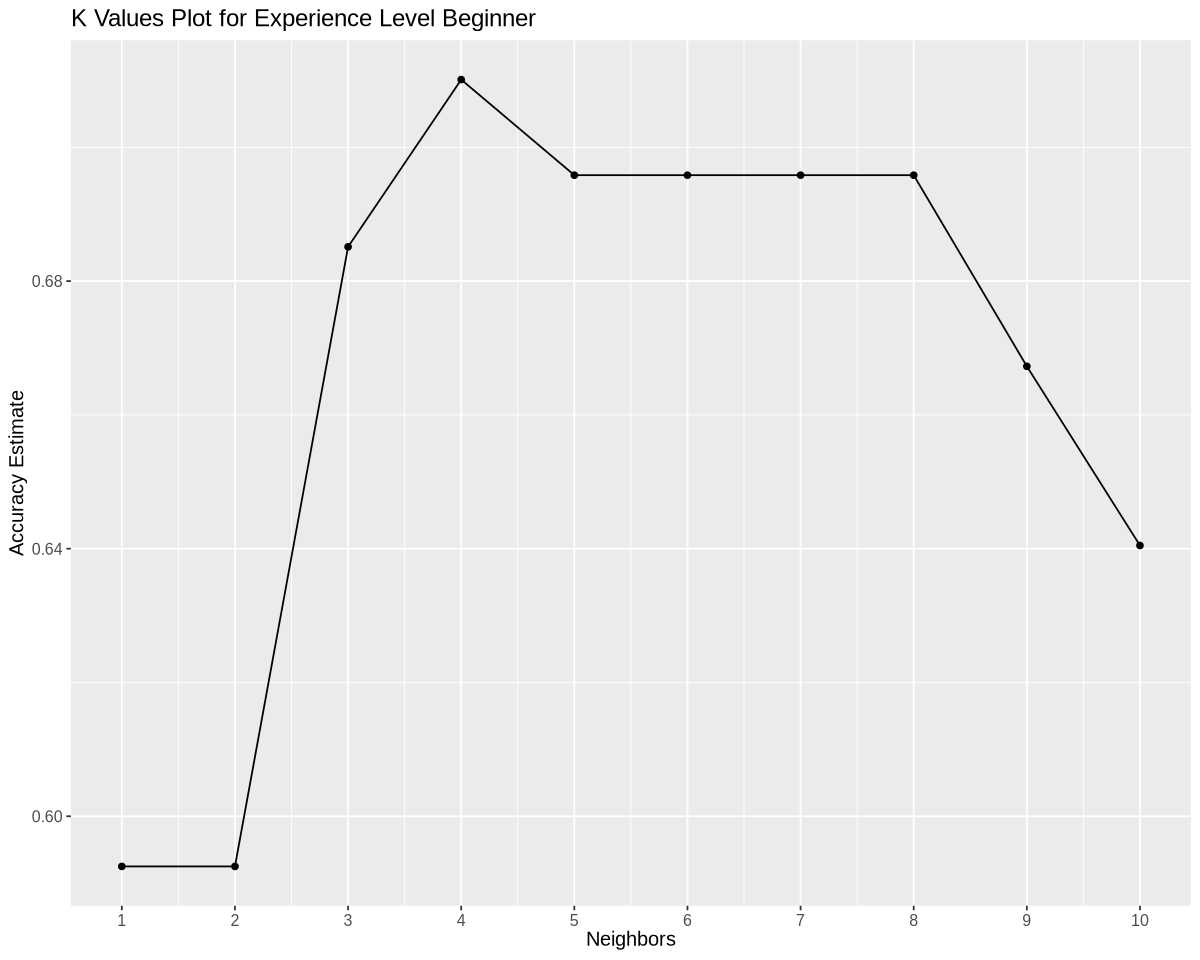

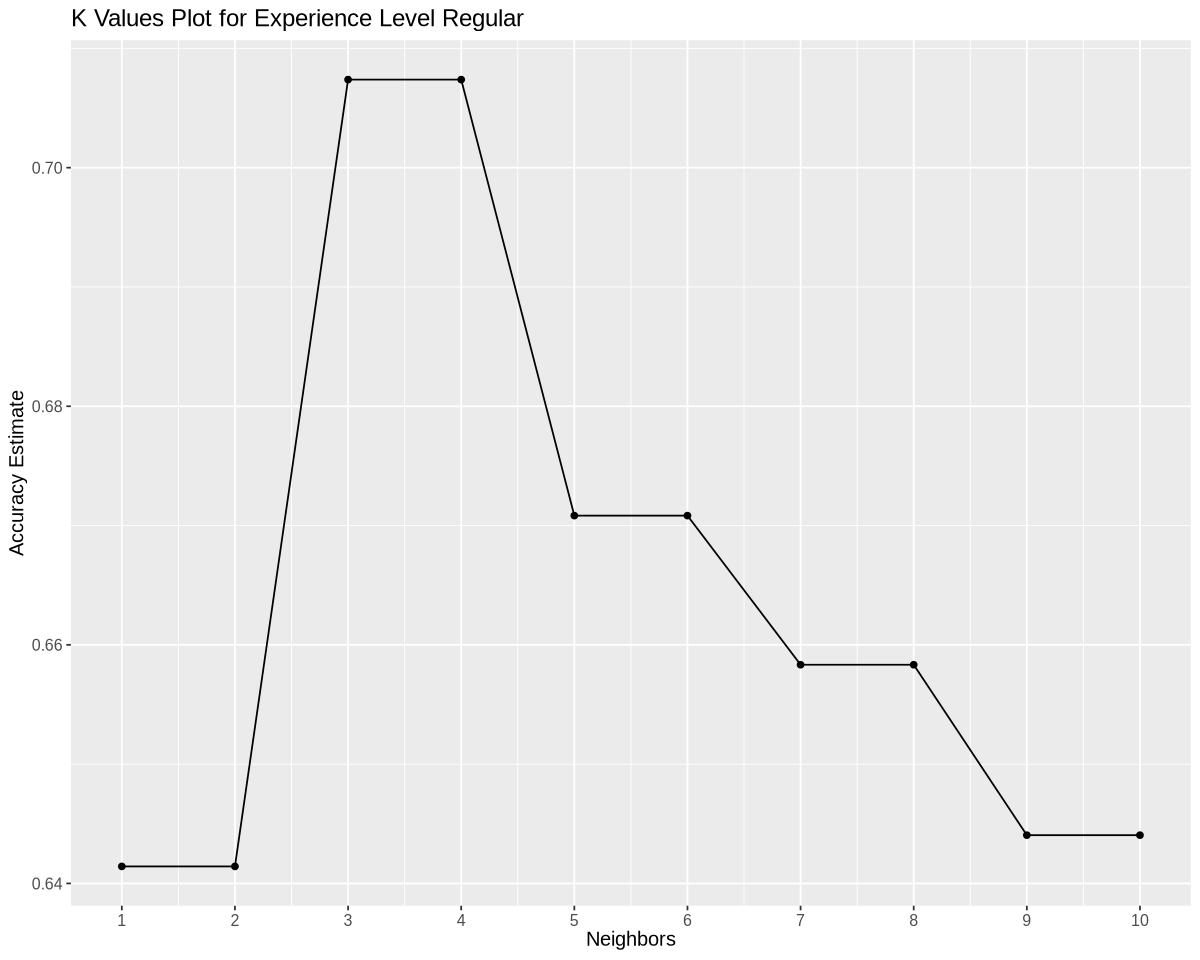

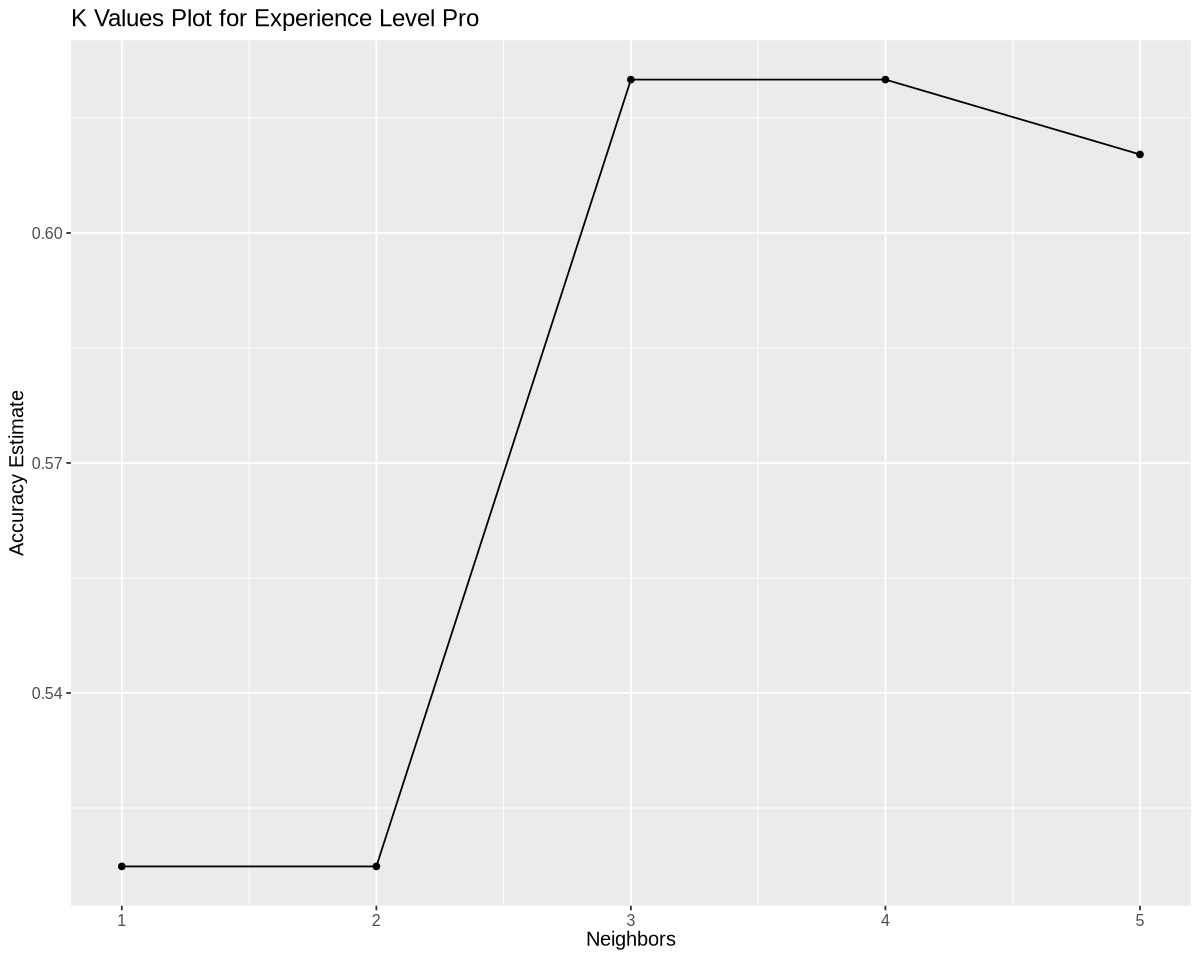

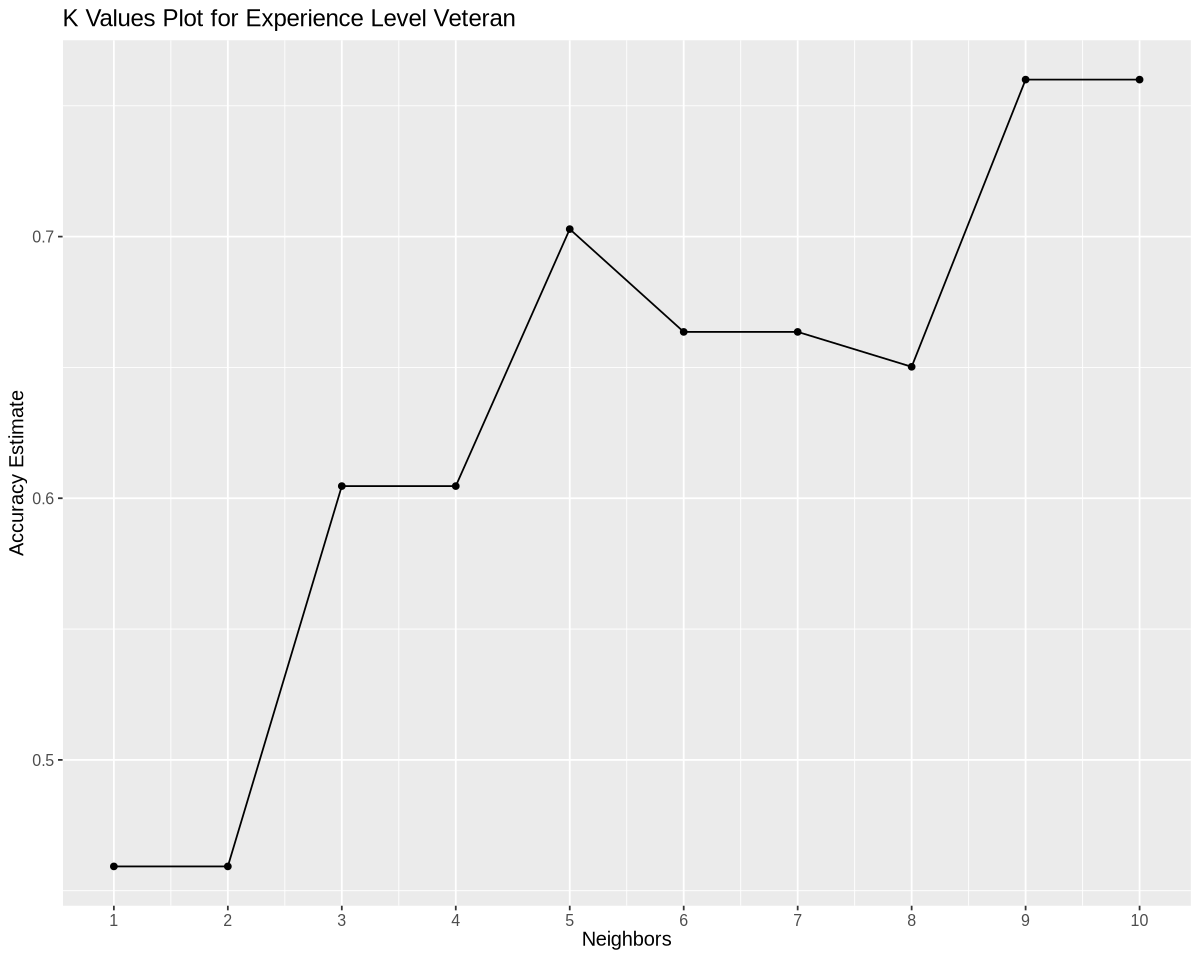

In [35]:
#plots of k values
amateur_kplot <- ggplot(amateur_tune_accuracy, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    scale_x_continuous(breaks = amateur_tune_accuracy$neighbors) +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("K Values Plot for Experience Level Amateur") +
    theme(text = element_text(size = 12))

beginner_kplot <- ggplot(beginner_tune_accuracy, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    scale_x_continuous(breaks = beginner_tune_accuracy$neighbors) +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("K Values Plot for Experience Level Beginner") +
    theme(text = element_text(size = 12))

regular_kplot <- ggplot(regular_tune_accuracy, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    scale_x_continuous(breaks = regular_tune_accuracy$neighbors) +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("K Values Plot for Experience Level Regular") +
    theme(text = element_text(size = 12))

pro_kplot <- ggplot(pro_tune_accuracy, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    scale_x_continuous(breaks = pro_tune_accuracy$neighbors) +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("K Values Plot for Experience Level Pro") +
    theme(text = element_text(size = 12))

veteran_kplot <- ggplot(veteran_tune_accuracy, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    scale_x_continuous(breaks = veteran_tune_accuracy$neighbors) +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("K Values Plot for Experience Level Veteran") +
    theme(text = element_text(size = 12))

amateur_kplot 
beginner_kplot
regular_kplot
pro_kplot
veteran_kplot

** not sure if this is right... this is taking too long to do

## References
https://plaicraft.ai/faq 